In [2]:
# Utility Maximization

def u (c):
    return -c[0] * c[1] # The utility function with a negative sign to accomplish a maximum through minimization

w = 10 # The initial wealth of the agent to be distributed between today and the future

from scipy.optimize import minimize

cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w}) # The budget constraint as an equality constraint for the minimize function

opt = minimize(u, (1, 1), constraints=cons) # The optimization with initial guess and budget constraint

opt['x'] # The optimal savings plan

-opt['fun'] # The maximum utility gained through the optimal plan

np.float64(24.999999999999986)

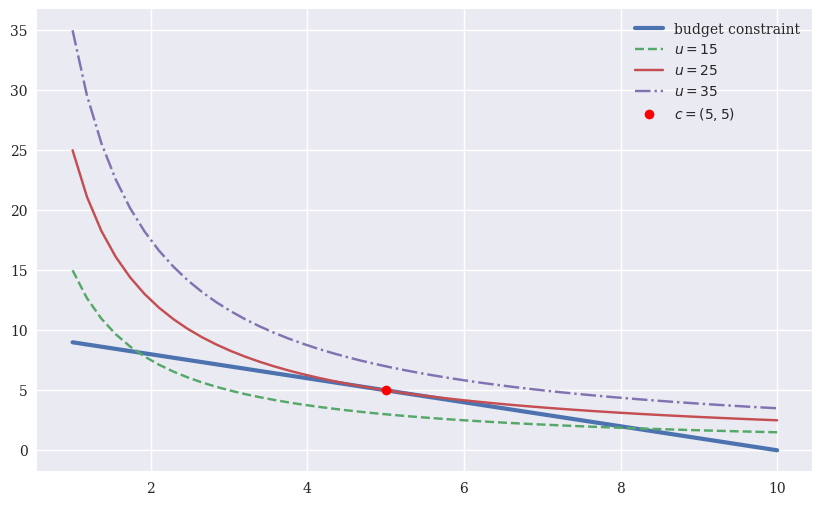

In [3]:
# Indifference Curves

def iu(u, c0):
    return u / c0 # Function for indifference curve

def c1(c0):
    return w - c0 # Function for budget line

import numpy as np 
np.set_printoptions(precision=5)
from pylab import mpl, plt 

plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

c0 = np.linspace(1, w) # The domain over which to plot both 

plt.figure(figsize=(10, 6))
plt.plot(c0, c1(c0), label='budget constraint', lw=3.0)
plt.plot(c0, iu(15, c0), '--', label='$u=15$')
plt.plot(c0, iu(25, c0), label='$u=25$')
plt.plot(c0, iu(35, c0), '-.', label='$u=35$')
plt.plot(opt['x'][0], opt['x'][1], 'ro', label='$c=(5, 5)$')
plt.legend(loc=0);

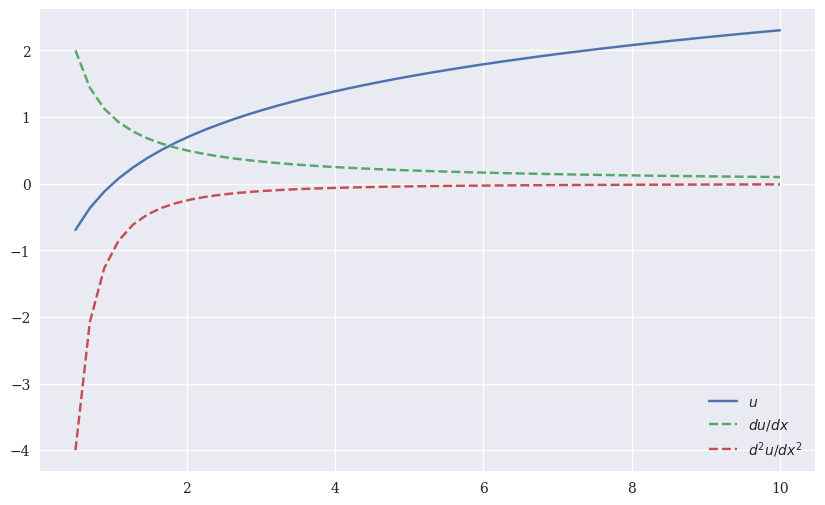

In [4]:
# Logarithmic Utility

x = np.linspace(0.5, 10, 50)    # Create ndarray object with floating point numbers between 0.5 and 10 and a homogeneous spacing to get 50 values
u = np.log(x)                   # Calculates the values for the utility function
u1 = 1 / x                      # And for its first derivative as well as...
u2 = -1 / x ** 2                # ...for its second derivitave

plt.figure(figsize=(10, 6))     
plt.plot(x, u, label='$u$')                 # Plots utility function
plt.plot(x, u1, '--', label='$du/dx$')      # Plots the first derivative
plt.plot(x, u2, '--', label='$d^2u/dx^2$')  # Plots the second derivative
plt.legend(loc=0);



In [5]:
# Time-Additive Utility
import math 
from scipy.optimize import minimize
kappa = 10 / 11

def U(c):
    return -(math.log(c[0]) + kappa * math.log(c[1])) # Utility function with a negative sign to accomplish a maximization through minimization

w = 10

const = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w}) # The budget constraint as an equality constraint for the minimize function. 

opt = minimize(U, (1, 1), constraints=const)
cs_plan = opt['x'] # The optimal consumption-saving plan, reflecting the time preference in that c_0 is higher than c_1 - by exactly 10%
print(f"The optimal consumption-saving plan time prefrence: {cs_plan}")
opt_utility = -opt['fun'] # The maximum utility gained through the optimal plan
# The utiliity value (3.075 represents the total lifetime satisfaction from this optimal consumption pattern.)
print(f"The optimal utility gained through the optimal plan: {opt_utility}")


The optimal consumption-saving plan time prefrence: [5.23811 4.76189]
The optimal utility gained through the optimal plan: 3.074728608303236


C:\Users\mickc\AppData\Local\Temp\ipykernel_49600\2663353042.py:16: RuntimeWarning: divide by zero encountered in log
  EU = p_u * np.log(c1_u) + p_d * np.log(c1_d)


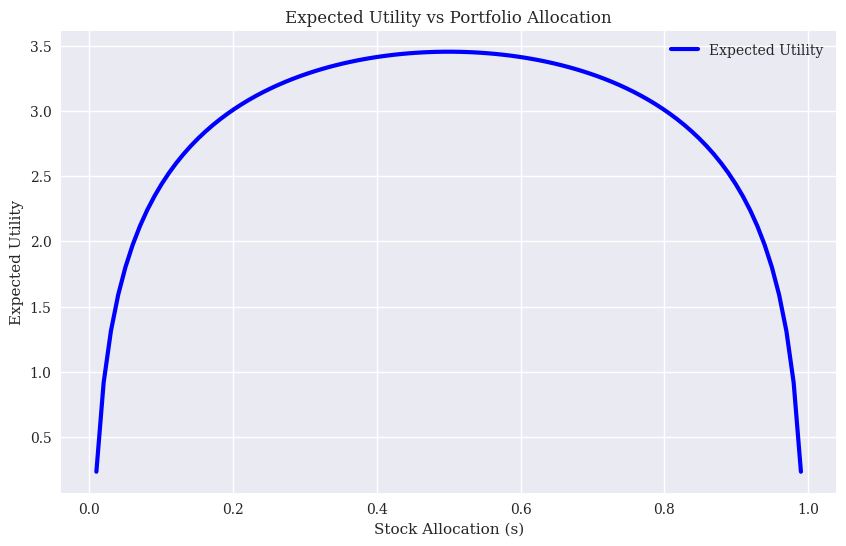

In [6]:
# Expected Utility

# Setup parameters
B0, B1 = 10, 11         # Bond prices
S0, Su, Sd = 10, 20, 5  # Stock prices
p_u, p_d = 0.6, 0.4     # Probabilities

s = np.linspace(0, 1, 100) # Stock allocation range
b = 1 - s # Bond allocation

# Calculate wealth in each state
c1_u = b * (B1 / B0) * w * s * (Su / S0) * w    # Up state wealth
c1_d = b * (B1 / B0) * w * s * (Sd / S0) * w     # Down state wealth

# Expected utility (logarithmic)
EU = p_u * np.log(c1_u) + p_d * np.log(c1_d)

# Expected Utility vs Stock Allocation
plt.figure(figsize=(10, 6))
plt.plot(s, EU, 'b-', linewidth=3, label='Expected Utility')
plt.xlabel('Stock Allocation (s)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Portfolio Allocation')
plt.grid(True)
plt.legend();

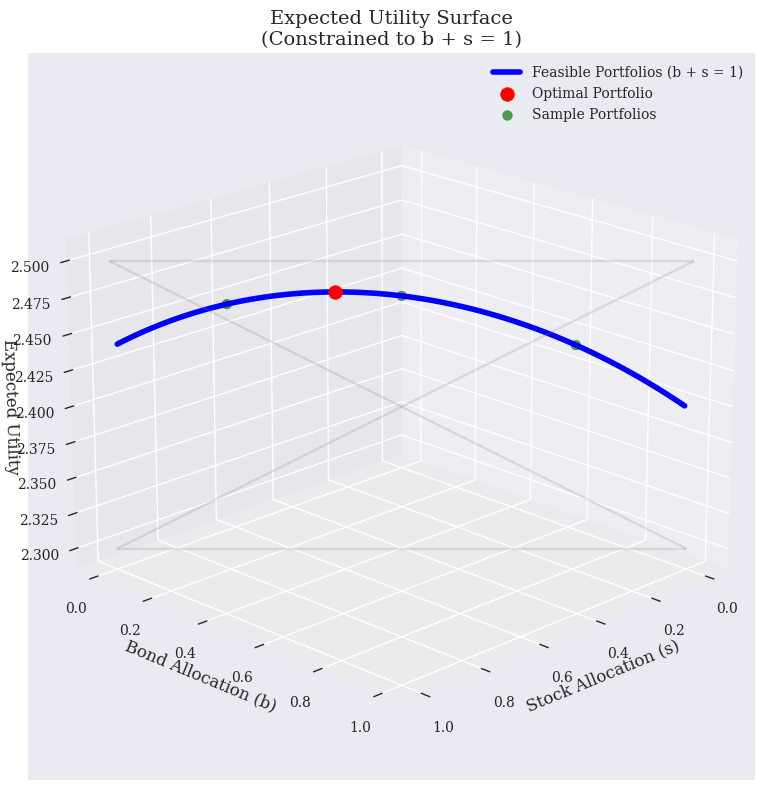

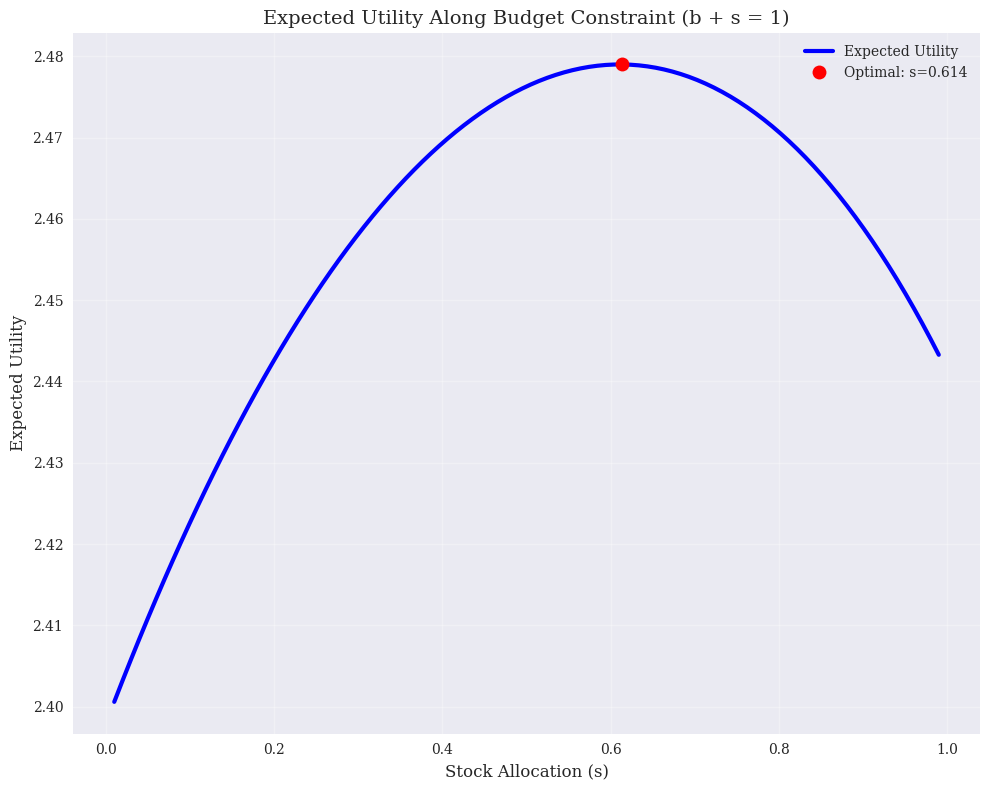

Optimal stock allocation: 0.614
Optimal bond allocation: 0.386
Maximum expected utility: 2.479


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup parameters
B0, B1 = 10, 11  # Bond prices
S0, Su, Sd = 10, 20, 5  # Stock prices
p_u, p_d = 0.6, 0.4  # Probabilities
w = 10  # Initial wealth

# Create meshgrid for portfolio weights
s_range = np.linspace(0, 1, 50)
b_range = np.linspace(0, 1, 50)
S_mesh, B_mesh = np.meshgrid(s_range, b_range)

# Create points directly along the constraint line b + s = 1
s_line = np.linspace(0.01, 0.99, 100)
b_line = 1 - s_line

# Calculate expected utility along the constraint
c1_u_constraint = b_line * (B1/B0) * w + s_line * (Su/S0) * w
c1_d_constraint = b_line * (B1/B0) * w + s_line * (Sd/S0) * w
EU_constraint = p_u * np.log(c1_u_constraint) + p_d * np.log(c1_d_constraint)

# Create 3D line plot showing the constraint
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the constraint line in 3D
line = ax.plot(s_line, b_line, EU_constraint, 'b-', linewidth=4, label='Feasible Portfolios (b + s = 1)')

# Add some surface context by creating a wireframe showing the constraint plane
s_plane = np.array([0, 1, 1, 0])
b_plane = np.array([1, 0, 0, 1]) 
z_plane = np.array([2.3, 2.3, 2.5, 2.5])  # Arbitrary z-values for reference
ax.plot_wireframe(s_plane.reshape(2,2), b_plane.reshape(2,2), z_plane.reshape(2,2), alpha=0.2, color='gray')

# Highlight the optimal point
optimal_idx = np.argmax(EU_constraint)
optimal_s = s_line[optimal_idx]
optimal_b = b_line[optimal_idx]
optimal_EU = EU_constraint[optimal_idx]

ax.scatter([optimal_s], [optimal_b], [optimal_EU], color='red', s=100, label=f'Optimal Portfolio')

# Add some sample portfolios for reference
sample_s = [0.2, 0.5, 0.8]
sample_b = [0.8, 0.5, 0.2]
sample_c1_u = np.array(sample_b) * (B1/B0) * w + np.array(sample_s) * (Su/S0) * w
sample_c1_d = np.array(sample_b) * (B1/B0) * w + np.array(sample_s) * (Sd/S0) * w
sample_EU = p_u * np.log(sample_c1_u) + p_d * np.log(sample_c1_d)
ax.scatter(sample_s, sample_b, sample_EU, color='green', s=50, alpha=0.7, label='Sample Portfolios')

# Add labels and title
ax.set_xlabel('Stock Allocation (s)', fontsize=12)
ax.set_ylabel('Bond Allocation (b)', fontsize=12)
ax.set_zlabel('Expected Utility', fontsize=12)
ax.set_title('Expected Utility Surface\n(Constrained to b + s = 1)', fontsize=14)

# Add legend
ax.legend()

# Set viewing angle for better visualization
ax.view_init(elev=20, azim=45)

# Add grid
ax.grid(True)

plt.tight_layout()
plt.show()

# Also create a 2D contour plot for easier interpretation
fig2, ax2 = plt.subplots(figsize=(10, 8))

# Create finer mesh for smoother contours
s_fine = np.linspace(0.01, 0.99, 100)
b_fine = 1 - s_fine  # Constraint: b + s = 1

# Calculate expected utility along the constraint line
c1_u_line = b_fine * (B1/B0) * w + s_fine * (Su/S0) * w
c1_d_line = b_fine * (B1/B0) * w + s_fine * (Sd/S0) * w
EU_line = p_u * np.log(c1_u_line) + p_d * np.log(c1_d_line)

# Plot the constraint line in 2D
ax2.plot(s_fine, EU_line, 'b-', linewidth=3, label='Expected Utility')
ax2.set_xlabel('Stock Allocation (s)', fontsize=12)
ax2.set_ylabel('Expected Utility', fontsize=12)
ax2.set_title('Expected Utility Along Budget Constraint (b + s = 1)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Find and mark the optimal point
optimal_idx = np.argmax(EU_line)
optimal_s = s_fine[optimal_idx]
optimal_EU = EU_line[optimal_idx]

ax2.plot(optimal_s, optimal_EU, 'ro', markersize=10, label=f'Optimal: s={optimal_s:.3f}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Optimal stock allocation: {optimal_s:.3f}")
print(f"Optimal bond allocation: {1-optimal_s:.3f}")
print(f"Maximum expected utility: {optimal_EU:.3f}")

In [39]:
# Optimal Investment Portfolio

B = (10, (11, 11))  # The bond price process
S = (10, (20, 5))   # The stock price process

M0 = np.array((B[0], S[0])) # The price vector of the two traded financial assets
M = np.array((B[1], S[1])).T  # The market payoff matrix of the two traded financial assets
p = 0.5                     # The physical probability measure for the economy

P = np.array((p, 1-p))      # The physical probability measure for the economy

def U(phi):
    c1 = np.dot(M, phi) # Gives us the consumption vector 
    return -np.dot(P, np.log(c1)) # The expected utility function with logarithmic utility

w = 10  # 

cons = ({'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}) # The budget constraint based on the dot product of the price and portfolio vectors

opt = minimize(U, (1, 1), constraints=cons) # The expected utility maximization problem as a minimization

print(f"Opt:\n{opt}")

opt_x = opt['x']                    # The optimal allocation between the bond and the stock
print(f"Opt['x']:{opt_x}")
neg_opt_fun = -opt['fun']           # The optimal expected utility value
print(f"Opt['fun']:{neg_opt_fun}")
fn_opt = -U(opt['x'])               # The optimal expected utility value
print(f"-U(opt['x']):{fn_opt}")
dotp = np.dot(M, opt['x'])          # The state-contingent payoff from the optimal portfolio
print(f"dot product of M and opt['x']: {dotp}")

Opt:
     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -2.418306269925803
           x: [ 6.944e-01  3.056e-01]
         nit: 5
         jac: [-1.000e+00 -1.000e+00]
        nfev: 15
        njev: 5
 multipliers: [-1.000e-01]
Opt['x']:[0.69442 0.30558]
Opt['fun']:2.418306269925803
-U(opt['x']):2.418306269925803
dot product of M and opt['x']: [13.75022  9.16652]


In [41]:
#  Time additive expected utility

M0 = np.array((1, B[0], S[0]))  # The price vector including the price of 1 for consumption today
kappa = 10 / 11                  # The time preference factor

# The expected utility function taking into account consumption today and the time preference
def U(phi):
    c0 = phi[0]             
    c1 = np.dot(M, phi[1:]) 
    # Added safety check for positive consumption
    if c0 <= 0 or np.any(c1 <= 0):
        return 1e10
    return -(np.log(c0) + kappa * np.dot(P, np.log(c1)))
# Bounds to ensure positive values
bounds = [(0.01, w), (0, w), (0, w)]

opt = minimize(U, (1, 1, 1), constraints=cons, bounds=bounds)
print(f"Opt:\n{opt}")
neg_opt = -opt['fun']               
print(f"Negative opt: {neg_opt:.4}")
consume_today = opt['x'][0] # This is what the agent consumes today from w. 
print(f"Consume {consume_today:.4} from wealth (w)")
sc_payoff = np.dot(M, opt['x'][1:])     # This is the state-contingent payoff from the bond and the stock positions
print(f"State-contingent payoff from bond and stock positions: {sc_payoff}")


Opt:
     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -3.1799295980388305
           x: [ 5.239e+00  3.309e-01  1.452e-01]
         nit: 8
         jac: [-1.909e-01 -1.909e+00 -1.910e+00]
        nfev: 32
        njev: 8
 multipliers: [-1.909e-01]
Negative opt: 3.18
Consume 5.239 from wealth (w)
State-contingent payoff from bond and stock positions: [6.54422 4.36571]


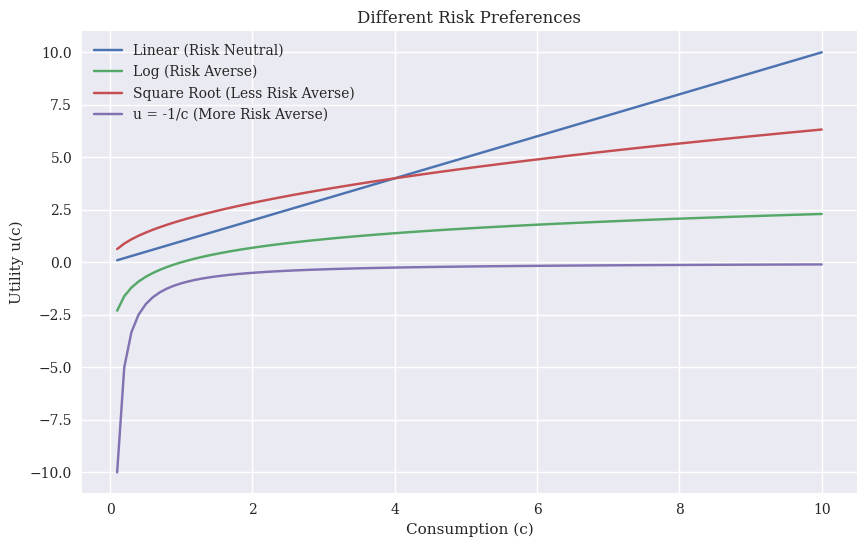

In [67]:
# Visualize Risk Profiles

import numpy as np
import matplotlib.pyplot as plt

c = np.linspace(0.1, 10, 100)

# Different utility functions
u_linear = c
u_log = np.log(c)
u_sqrt = 2*np.sqrt(c)  # Power utility with γ = 0.5
u_power2 = -1/c  # Power utility with γ = 2

plt.figure(figsize=(10, 6))
plt.plot(c, u_linear, label='Linear (Risk Neutral)')
plt.plot(c, u_log, label='Log (Risk Averse)')
plt.plot(c, u_sqrt, label='Square Root (Less Risk Averse)')
plt.plot(c, u_power2, label='u = -1/c (More Risk Averse)')
plt.xlabel('Consumption (c)')
plt.ylabel('Utility u(c)')
plt.legend()
plt.grid(True)
plt.title('Different Risk Preferences')
plt.show()

In [ ]:
# A Numerical Example I

p = 1 / 3                   # Probability measure
P = np.array((p, (1 - p)))    # Probability measure

B1 = np.array((11, 11)) # Bond payout vector
S1 = np.array((20, 5))  # Stock payout vector

zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P) # The price ratio zeta given optimality conditions
print(f"Price ratio Zeta given optimality conditions: {zeta:.4}")

w = 15 # Initial Wealth

B0 = w / (1 + zeta) # The equilibrium price level of the risk-less bond given the price ratio zeta and initial wealth w
print(f"The equilibrium price level: B0 = {B0:.4}")

S0 = zeta * B0 # The resulting equilibrium price level of the risky stock
print(f"The resulting equilibrium level of the risky stock: S0 = {S0:.4}")

budget_constraint = B0 + S0 # The budget constraint is binding
print(f"Budget constraint is binding. B0 + S0 = {budget_constraint:.4}")

i = B1.mean() / B0 - 1 # The equilibrium interest rate given the price level for the risk-less bond. i.e. risk-free rate
print(f"Equilibrium interest rate given the price level for the risk-less bond: {i:.4}")

mu = np.dot(S1, P) / S0 - 1 # The equilibrium expected rate of return of the risky stock
print(f"Equilibrium expected rate of return of the risky stock: {mu:.4}")

import sympy as sy # Imports the symbolic computation package SymPy

q = sy.Symbol('q') # Defining the symbol q

eq = (q * 20 + (1 - q) * 5) / (1 + i) - S0 # Formulating the equation for q given the martingale condition
print(f"The equation q simplified given the martingale condition: {eq}")

q = sy.solve(eq)[0] # This solves the equation numerically
print(f"Equation solved numerically: {q}")

Q = np.array((q, 1 - q)) # The resulting martingale measure
print(f"Resulting martingale measure: {Q}")

bond1 = np.dot(B1, Q) / (1 + i) # Both discounted price processes are martingales under Q
stock1 = np.dot(S1, Q) / (1 + i) # Both discounted price processes are martingales under Q 

print(f"Discounted bond price process: {bond1}")
print(f"Discounted stock price process: {stock1}")

Price ratio Zeta given optimality conditions: 0.7343
The equilibrium price level: B0 = 8.649
The resulting equilibrium level of the risky stock: S0 = 6.351
Budget constraint is binding. B0 + S0 = 15.0
Equilibrium interest rate given the price level for the risk-less bond: 0.2718
Equilibrium expected rate of return of the risky stock: 0.5746
The equation q simplified given the martingale condition: 11.7943548387097*q - 2.41935483870968
Equation solved numerically: 0.205128205128205
Resulting martingale measure: [0.205128205128205 0.794871794871795]
Discounted bond price process: 8.64919354838710
Discounted stock price process: 6.35080645161290


In [106]:
# Pricing In Incomplete Markets

p = 1 / 3 # The probability measure

P = np.array((p, p, p)) # The probability measure

B1 = np.array((11, 11, 11)) # Bond payoff vector
S1 = np.array((20, 10, 5))  # Stock

zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P) # The relative price zeta given optimality conditions
print(f"Relative price zeta given optimality conditions: {zeta:.5}")

w = 15 # Initial wealth

B0 = w / (1 + zeta) # The equilibrium price level of the risk-less bond given the price ratio zeta and initial wealth w
print(f"Equilibrium price level of risk-less bond: {B0:.5}")
S0 = zeta * B0      # The resulting equilibrium price level of the risky stock
print(f"Resulting equilibrium price level of risky stock: {S0:.5}")

budget_constraint = B0 + S0 # The budget constraint is binding
print(f"Budget constraint: {budget_constraint}")

i = B1.mean() / B0 - 1 # The equilibrium interest rate given the price level for the risk-less bond
print(f"The equilibrium interest rate given the price level for the risk-less bond: {i:.5}")

mu = np.dot(S1, P) / S0 - 1 # The equilibrium expected return rate of the risky stock
print(f"The equilibrium expected return rate of the risky stock: {mu:.5}")

Relative price zeta given optimality conditions: 0.91553
Equilibrium price level of risk-less bond: 7.8307
Resulting equilibrium price level of risky stock: 7.1693
Budget constraint: 15.0
The equilibrium interest rate given the price level for the risk-less bond: 0.40472
The equilibrium expected return rate of the risky stock: 0.62732


In [107]:
# A Numerical Example II

p = 1 / 3               # The probability measure
P = np.array((p, p, p)) # The probability measure

B1 = np.array((11, 11, 11)) # Bond payoff vector
S1 = np.array((20, 10, 5))  # Stock payoff vector
C1 = np.array((5, 0, 0))    # Contingent claim payoff vector

zeta_1 = (np.dot(S1 / (B1 + S1 + C1), P) / np.dot(B1 / (B1 + S1 + C1), P)) # The first relative price
print(f"First relative price zeta 1: {zeta_1:.3}")

zeta_2 = (np.dot(C1 / (B1 + S1 + C1), P) / np.dot(B1 / (B1 + S1 + C1), P)) # The second relative price
print(f"Second relative price zeta 2: {zeta_2:.3}")

w = 15 # Initial wealth...

B0 = w / (1 + zeta_1 + zeta_2) # ...and the resulting price for the risk-less bond
print(f"With initial wealth {w}, the resulting price for the risk-less bond is: {B0:.3}")

S0 = zeta_1 * B0 # The equilibrium price for the risky stock
print(f"Equilibrimum price for risky stock: {S0:.3}")
C0 = zeta_2 * B0 # The equilibrium price for the contingent claim
print(f"Equilibrimum price for contingent claim: {C0:.3}")

budget_constraint = B0 + C0 + S0 # The budget constraint is binding
print(f"The budget constraint is binding: {budget_constraint:.3}")

i = B1.mean() / B0 - 1 # The risk-less interest rate
print(f"Risk-less interest rate: {i:.3}")

muS = np.dot(S1, P) / S0 - 1 # The equilibrium expected rate of return for the risky stock
muC = np.dot(C1, P) / C0 - 1 # The equilibrium expected rate of return for the contingent claim
print(f"The equilibrium expected rate of return for the risky stock: {muS:.3}")
print(f"The equilibrium expected rate of return for the contingent claim: {muC:.3}")

M = np.array((B1, S1, C1)).T # The new market payoff matrix including the contingent claim

M0 = np.array((B0, S0, C0)) # The vector with the prices of the three financial assets/contingent claims

Q = np.linalg.solve(M.T / (1 + i), M0) # This solves for the vector Q representing the martingale measure Q (Note the use of the transpose operator .T)

solution_vector = sum(Q)
print(f"Solution Vector: {solution_vector}") # The solution vector whose components add up to 1
np.allclose(np.dot(M.T, Q), M0 * (1 + i)) # A final check whether all discounted price processes are indeed martingales

First relative price zeta 1: 0.886
Second relative price zeta 2: 0.0916
With initial wealth 15, the resulting price for the risk-less bond is: 7.58
Equilibrimum price for risky stock: 6.72
Equilibrimum price for contingent claim: 0.694
The budget constraint is binding: 15.0
Risk-less interest rate: 0.45
The equilibrium expected rate of return for the risky stock: 0.736
The equilibrium expected rate of return for the contingent claim: 1.4
Solution Vector: 1.0


True